# 12주차(목) 실습문제 - 다중회귀모델 (Ch.5.3)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")

---

## 1. 혈당값 예측에 대한 다중회귀모델
### 1-1. seaborn의 pairplot() 함수를 이용해서 데이터 내 변량의 분포를 그리시오.
남녀를 각각 다른 색깔로 표시할 것.

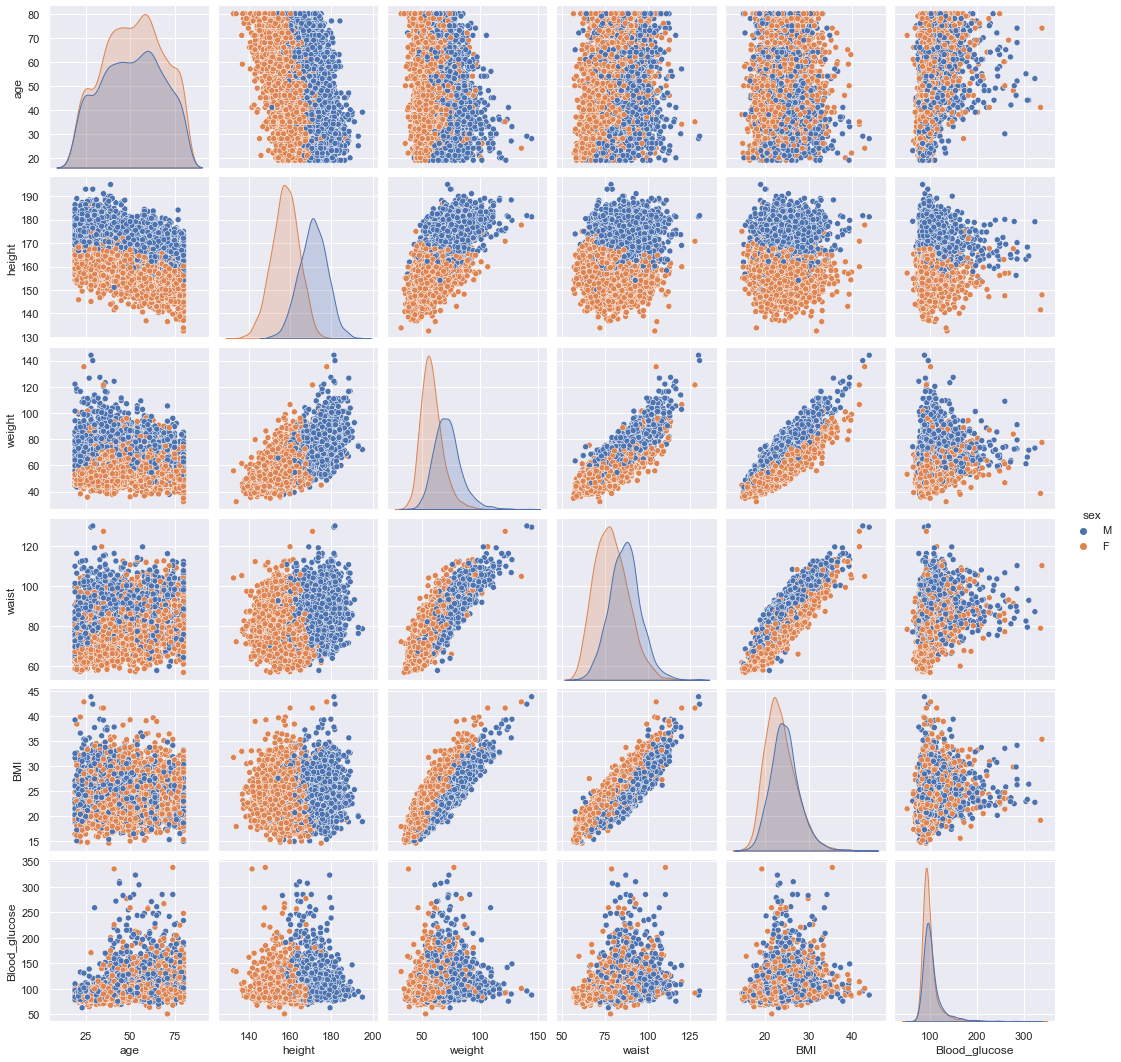

In [2]:
sns.pairplot(data=data, hue = "sex")

### 1-2. 혈당값을 예측하는 다중회귀모델을 만드시오 (독립변수로 age, height, weight, waist, BMI, sex를 포함시킬 것). t검정을 기준으로 유의미한 독립변수는 무엇인가?

In [3]:
model_full = smf.ols(formula = "Blood_glucose ~ age + height + weight + waist + BMI + sex", data = data).fit()
model_full.summary()
# t검정에서 p값 0.05 이하인 독립변수는 sex, age, waist 임

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Blood_glucose   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 20 May 2021   Prob (F-statistic):          7.98e-187
Time:                        12:33:43   Log-Likelihood:                -26719.
No. Observations:                5968   AIC:                         5.345e+04
Df Residuals:                    5961   BIC:                         5.350e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6678     31.380      0.531      0.595     -44.848      78.184
sex[T.M]       2.8906      0.876      3.300      0.001       1.173       4.608
age            0.2374      0.023     10.153      0.000       0.192       0.283
height         0.1459      0.191      0.763      0.445      -0.229       0.521
weight        -0.3238      0.233     -1.392      0.164      -0.780       0.132
waist          0.7397      0.073     10.089      0.000       0.596       0.883
BMI            0.3023      0.652      0.463      0.643      -0.977       1.581
==============================================================================
Omnibus:                     5028.183   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167275.283
Skew:                           3.913   Prob(JB):                         0.00
Kurtosis:                      27.728   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-3. Type-II ANOVA를 이용해서 각각의 요인(독립변수)이 설명하는 수정제곱합을 구하시오. 가장 많은 제곱합을 설명하는 요인이 무엇인지 그 순서를 이야기하시오.

In [4]:
sm.stats.anova_lm(model_full, typ=2).round(3)
# 가장 많은 제곱합을 설명하는 것으로 age, waist, sex, weight, height, BMI 순서.

,sum_sq,df,F,PR(>F)
sex,4939.468,1.0,10.887,0.001
age,46771.401,1.0,103.089,0.000
height,264.443,1.0,0.583,0.445
weight,878.689,1.0,1.937,0.164
waist,46176.838,1.0,101.778,0.000
BMI,97.413,1.0,0.215,0.643
Residual,2704503.633,5961.0,NaN,NaN


### 1-4. 위의 순서를 따라 독립변수가 0개인 모델(null model)부터 6개인 모델까지 만들고, 각각의 결정계수와 AIC를 구하여 비교하시오. 결정계수가 눈에 띄게 증가하는 건 몇번째 모델까지인가? AIC가 가장 작은 모델은 무엇인가?

In [5]:
model0 = smf.ols(formula = "Blood_glucose ~ 1", data = data).fit()
model1 = smf.ols(formula = "Blood_glucose ~ age", data = data).fit()
model2 = smf.ols(formula = "Blood_glucose ~ age + waist", data = data).fit()
model3 = smf.ols(formula = "Blood_glucose ~ age + waist + sex", data = data).fit()
model4 = smf.ols(formula = "Blood_glucose ~ age + waist + sex + weight", data = data).fit()
model5 = smf.ols(formula = "Blood_glucose ~ age + waist + sex + weight + height", data = data).fit()
model6 = smf.ols(formula = "Blood_glucose ~ age + waist + sex + weight + height + BMI", data = data).fit()

[model0.rsquared, model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared, model5.rsquared, model6.rsquared]
# 모델 4까지 결정계수가 높아진 뒤 거의 변화가 없다.

[0.0,
 0.07026853671573507,
 0.13307465837656662,
 0.13543429997434786,
 0.13702404225631026,
 0.13717067715137488,
 0.13720175404844714]

In [6]:
[model0.aic, model1.aic, model2.aic, model3.aic, model4.aic, model5.aic, model6.aic]
# 모델 4가 AIC가 가장 낮다.

[54321.0248279541,
 53888.19942930646,
 53472.78000287824,
 53458.51384910141,
 53449.52993496631,
 53450.51577993306,
 53452.30082402358]

## 2. 다중회귀모델을 이용한 혈당값 예측
### 2-1. data의 처음 100개 샘플에 대해 예측값 vs. 관측값의 그래프를 그리시오. (독립변수 age, waist, sex를 포함한 모델을 사용할 것)
x축에는 예측값, y축에는 실제 혈당값(Blood_glucose)가 놓이도록 그래프를 그릴 것. (가능하면 sns.regplot이나 sns.lmplot을 이용해 추세선을 넣고 비교하라)

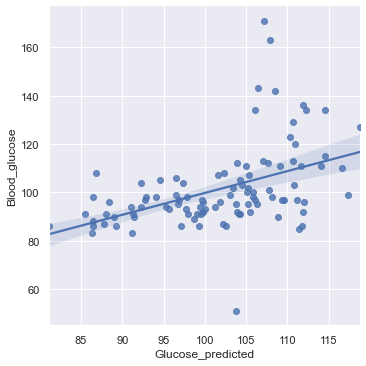

In [7]:
data['Glucose_predicted'] = model3.predict()
data100 = data.head(100);
sns.lmplot(x='Glucose_predicted', y='Blood_glucose', data=data100)

### 2-2. data 각 행에 대해 모델이 예측한 혈당값(Glucose_predicted)을 구하고, 연령별로 혈당값 예측의 그래프를 그리시오. 또한 실제 혈당값에 대해 같은 그래프를 그려보고 비교하시오.
x축은 연령(예: 19~80세), y축은 예측된 혈당값. (힌트: sns.boxplot 등 사용)

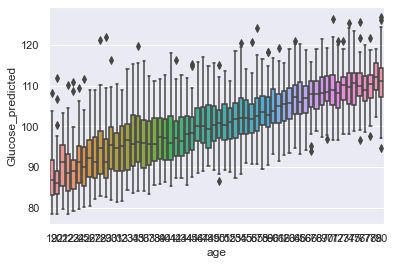

In [8]:
data['Glucose_predicted'] = model3.predict()
sns.boxplot(x = 'age', y='Glucose_predicted', data=data)

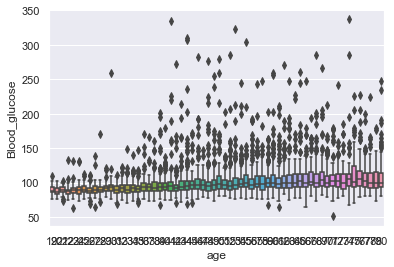

In [9]:
sns.boxplot(x = 'age', y='Blood_glucose', data=data)

### 2-3. 공복혈당량을 100 mg/dL 이하로 낮추고 싶다고 가정하자. 나이와 성별을 입력하면, 위의 모델을 따라 허리둘레(waist)가 얼마 이하여야 예상 공복혈당량이 100이 되는지 알려주는 코드를 작성하시오.
나이: 40세, 성별: 남성 기준으로 테스트

In [10]:
model3.params
age = float(input('나이:'))
sex = int(input("성별(남성=1, 여성=0):"))
base_predict = model3.params[0] + sex*model3.params[1] + age*model3.params[2] 
waist = (100 - base_predict)/model3.params[3]
print('목표 허리둘레(cm):', waist)

나이:40
성별(남성=1, 여성=0):1
목표 허리둘레(cm): 83.38008525239897


In [11]:
model3.params[0] + sex*model3.params[1] + age*model3.params[2] 

55.6637176559029

In [12]:
model3.params[3]

0.5317370713868571

In [13]:
(100 - base_predict)

44.3362823440971